<h1>S03 T05: Exploratory Data Analysis</h1>

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2> Functions </h3>

In [370]:
"""At first, I was was placing the functions at the bottom of the notebook and everything 
was working good but when I closed the notebook and run all the cells there was a problem with
the functions.
"""

#Function for describe the DF

def description_numeric(df,col):
    return df[col].describe()

In [371]:
#Function that evaluated the flight status and label it as Ontime or Delayed

def conditional_time(actual,crs):
    if [actual] <=  [crs]:
        return  "OnTime"
    else:
        return  "Delayed"

In [372]:
#Function that sort values of DF

def sort_values(df,col):
    return df.sort_values(by =col,ascending=False)


In [373]:
#Function that creates a pandas Series
def create_series(df,col):
    return pd.Series(df[col])

<h2>Nivell 1</h2>

<h3>Exercises 1: Download the Airlines Delay: Airline on-time statistics and delay causes dataset and upload it to a Dataframe pandas. Explore the data it contains, and keep only the columns you consider relevant.</h3>

In [374]:
"""This line will read the csv file at first the DF has a column with the index,
then I use the parameter "index_col" to arrange the DF. There is a bug or something
when I tried index_col=0 there is a warning, so I tried index_col=[0] that fix it but 
sometimes the warning appears with the index_col=[0] and doesn't appears using index_col=0 ... 

THE WARNING: 

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: 
FutureWarning: elementwise comparison failed; returning scalar instead, but in the 
future will perform elementwise comparison
  mask |= (ar1 == a)
  
"""

df = pd.read_csv('/Volumes/GoogleDrive/Mi unidad/Barcelona Activa/Itinerario Data Science/S03/Airline_Delay/DelayedFlights.csv',index_col =[0])


In [375]:
"""This line will show only the first 6 rows of the DF"""


df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [376]:
""" 
In this section a copy of the DF is created because the DF will suffer some modifies, the first
modification is rename the column name "DayofMonth" to "Day".
"""


df_copy = df.copy()
df_delay = df_copy.rename(columns={"DayofMonth":"Day"})

In [377]:
"""
In this line a subset of columns is selected

"""
date = df_delay[["Year","Month","Day"]]

In [378]:
"""
The subset created above will merge and shape as date format in a new column called "Date"

"""
df_delay["Date"]=pd.to_datetime(date)


In [379]:
"""
The column "DayOfWeek" represents the day but with an integer its hard to know 
because its less to common call "1" to "Mondays" and as I read the convention is from 0-6 but 
in this dataset begins with 1 in the first try I didn't know this. The first try raised an error
with 7 as missing value .

The first way that I tried to format the "DayOfWeek" is create a dict with the numeric values and used 
the lambda function changes the integers values to strings.

The second is a pandas function that converts the integer values to names days,
this function is only showed in markdown.

Why convert the day? well, it's only for a global view, I feel that have the
name day is better


"""

days = {1: "Monday",2: "Tuesday",3: "Wendesday",4: "Thursday",5: "Friday",6: "Saturday",7: "Sunday" }

df_delay["DayName"] = df_delay["DayOfWeek"].apply(lambda x: days[x])



```python

#more ways of doing the same..
df_delay["DayofWeek"] = df_delay["Date"].dt.day_name()


days={1: "Monday",2: "Tuesday",3: "Wendesday",4: "Thursday",5: "Friday",6: "Saturday",7: "Sunday"}
df_delay["DayofWeek"] = df_delay["DayOfWeek"].map(days,"DayOfWeek")



```


In [380]:
df_delay

,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,DayName
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,Thursday
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,Thursday
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,Thursday
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,0,N,0,2.0,0.0,0.0,0.0,32.0,2008-01-03,Thursday
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,0,N,0,3.0,0.0,0.0,0.0,22.0,2008-12-13,Saturday
7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,0,N,0,0.0,57.0,18.0,0.0,0.0,2008-12-13,Saturday
7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,0,N,0,1.0,0.0,19.0,0.0,79.0,2008-12-13,Saturday
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-12-13,Saturday


In [381]:
#This line is only with the purpose of read all the columns and types

df_delay.dtypes

Year                          int64
Month                         int64
Day                           int64
DayOfWeek                     int64
DepTime                     float64
CRSDepTime                    int64
ArrTime                     float64
CRSArrTime                    int64
UniqueCarrier                object
FlightNum                     int64
TailNum                      object
ActualElapsedTime           float64
CRSElapsedTime              float64
AirTime                     float64
ArrDelay                    float64
DepDelay                    float64
Origin                       object
Dest                         object
Distance                      int64
TaxiIn                      float64
TaxiOut                     float64
Cancelled                     int64
CancellationCode             object
Diverted                      int64
CarrierDelay                float64
WeatherDelay                float64
NASDelay                    float64
SecurityDelay               

In [382]:

#In this section a subset of columns is selected as a new DF for the statistical summary



new_df_delay = df_delay[["Date","DayName","UniqueCarrier","FlightNum","Origin","Dest","Distance","CRSDepTime","CRSArrTime","DepTime","ArrTime","DepDelay","ArrDelay","AirTime","TaxiIn","TaxiOut","ActualElapsedTime","CRSElapsedTime","Cancelled"]]

In [383]:

#A new DF is created with the former subset


new_delay_df = pd.DataFrame(new_df_delay)

In [384]:
new_delay_df

,Date,DayName,UniqueCarrier,FlightNum,Origin,Dest,Distance,CRSDepTime,CRSArrTime,DepTime,ArrTime,DepDelay,ArrDelay,AirTime,TaxiIn,TaxiOut,ActualElapsedTime,CRSElapsedTime,Cancelled
0,2008-01-03,Thursday,WN,335,IAD,TPA,810,1955,2225,2003.0,2211.0,8.0,-14.0,116.0,4.0,8.0,128.0,150.0,0
1,2008-01-03,Thursday,WN,3231,IAD,TPA,810,735,1000,754.0,1002.0,19.0,2.0,113.0,5.0,10.0,128.0,145.0,0
2,2008-01-03,Thursday,WN,448,IND,BWI,515,620,750,628.0,804.0,8.0,14.0,76.0,3.0,17.0,96.0,90.0,0
4,2008-01-03,Thursday,WN,3920,IND,BWI,515,1755,1925,1829.0,1959.0,34.0,34.0,77.0,3.0,10.0,90.0,90.0,0
5,2008-01-03,Thursday,WN,378,IND,JAX,688,1915,2110,1940.0,2121.0,25.0,11.0,87.0,4.0,10.0,101.0,115.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008-12-13,Saturday,DL,1621,MSP,ATL,906,1220,1552,1250.0,1617.0,30.0,25.0,120.0,9.0,18.0,147.0,152.0,0
7009717,2008-12-13,Saturday,DL,1631,RIC,ATL,481,600,749,657.0,904.0,57.0,75.0,78.0,15.0,34.0,127.0,109.0,0
7009718,2008-12-13,Saturday,DL,1631,ATL,IAH,689,847,1010,1007.0,1149.0,80.0,99.0,122.0,8.0,32.0,162.0,143.0,0
7009726,2008-12-13,Saturday,DL,1639,IAD,ATL,533,1240,1437,1251.0,1446.0,11.0,9.0,89.0,13.0,13.0,115.0,117.0,0


<h3>Exercici 2: Statistical summary of the data set </h3>

<h4>Summary with statistical values of the data </h4>

In [385]:
"""For the EDA I think that the best practice is use pandas function df.describe() 
the problem  is when the data type isn't homogeneous the function will ignore the non-numeric
values but you can include all but doesn't look good because there are columns that works
only as reference/information"""


describe_all = new_delay_df.describe(include='all')
describe_all

/var/folders/dh/zgkrvpwn7m3__1vpx517jpzw0000gn/T/ipykernel_2212/341194349.py:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  describe_all = new_delay_df.describe(include='all')


,Date,DayName,UniqueCarrier,FlightNum,Origin,Dest,Distance,CRSDepTime,CRSArrTime,DepTime,ArrTime,DepDelay,ArrDelay,AirTime,TaxiIn,TaxiOut,ActualElapsedTime,CRSElapsedTime,Cancelled
count,1936758,1936758,1936758,1.936758e+06,1936758,1936758,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.928371e+06,1.928371e+06,1.929648e+06,1.936303e+06,1.928371e+06,1.936560e+06,1.936758e+06
unique,366,7,20,NaN,303,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008-01-02 00:00:00,Friday,WN,NaN,ATL,ORD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10857,323259,377602,NaN,131613,108984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2008-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.184263e+03,NaN,NaN,7.656862e+02,1.467473e+03,1.634225e+03,1.518534e+03,1.610141e+03,4.318518e+01,4.219988e+01,1.082771e+02,6.812975e+00,1.823220e+01,1.333059e+02,1.343027e+02,3.268348e-04
std,NaN,NaN,NaN,1.944702e+03,NaN,NaN,5.744797e+02,4.247668e+02,4.646347e+02,4.504853e+02,5.481781e+02,5.340250e+01,5.678472e+01,6.864261e+01,5.273595e+00,1.433853e+01,7.206007e+01,7.134144e+01,1.807562e-02
min,NaN,NaN,NaN,1.000000e+00,NaN,NaN,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,-1.090000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00
25%,NaN,NaN,NaN,6.100000e+02,NaN,NaN,3.380000e+02,1.135000e+03,1.325000e+03,1.203000e+03,1.316000e+03,1.200000e+01,9.000000e+00,5.800000e+01,4.000000e+00,1.000000e+01,8.000000e+01,8.200000e+01,0.000000e+00


In [386]:
#One solution is select the numeric columns of interest

describe_numeric = new_delay_df[["Distance","DepDelay","ArrDelay","AirTime","TaxiIn","TaxiOut","CRSElapsedTime","ActualElapsedTime"]].describe()
describe_numeric

numeric_col = ["Distance","DepDelay","ArrDelay","AirTime","TaxiIn","TaxiOut","ActualElapsedTime"]

numeric_describe = description_numeric(new_delay_df,numeric_col)

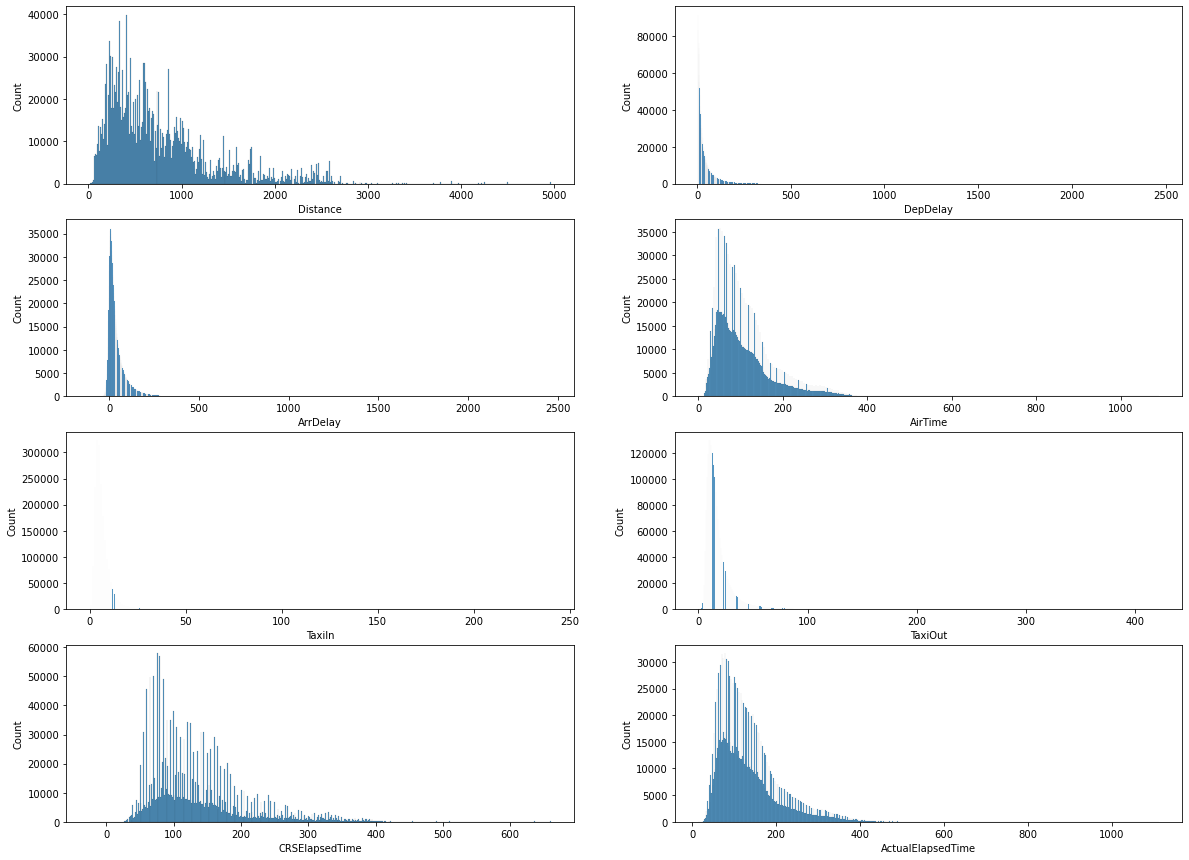

In [387]:
col_names = describe_numeric.columns
col_names

fig, axes = plt.subplots(4, 2,figsize=(20,15))
axes = axes.flatten()

for i, attribute in enumerate(col_names):
    summary_numeric = sns.histplot(x=attribute, data=new_delay_df, ax=axes[i])

fig_summary_numeric = summary_numeric.figure

fig_summary_numeric.savefig("summary_numeric.png")   




In [388]:
#Select the object columns of interest

describe_categorical_1 = new_delay_df[["DayName","UniqueCarrier","Origin","Dest"]].describe()
describe_categorical_1

,DayName,UniqueCarrier,Origin,Dest
count,1936758,1936758,1936758,1936758
unique,7,20,303,304
top,Friday,WN,ATL,ORD
freq,323259,377602,131613,108984


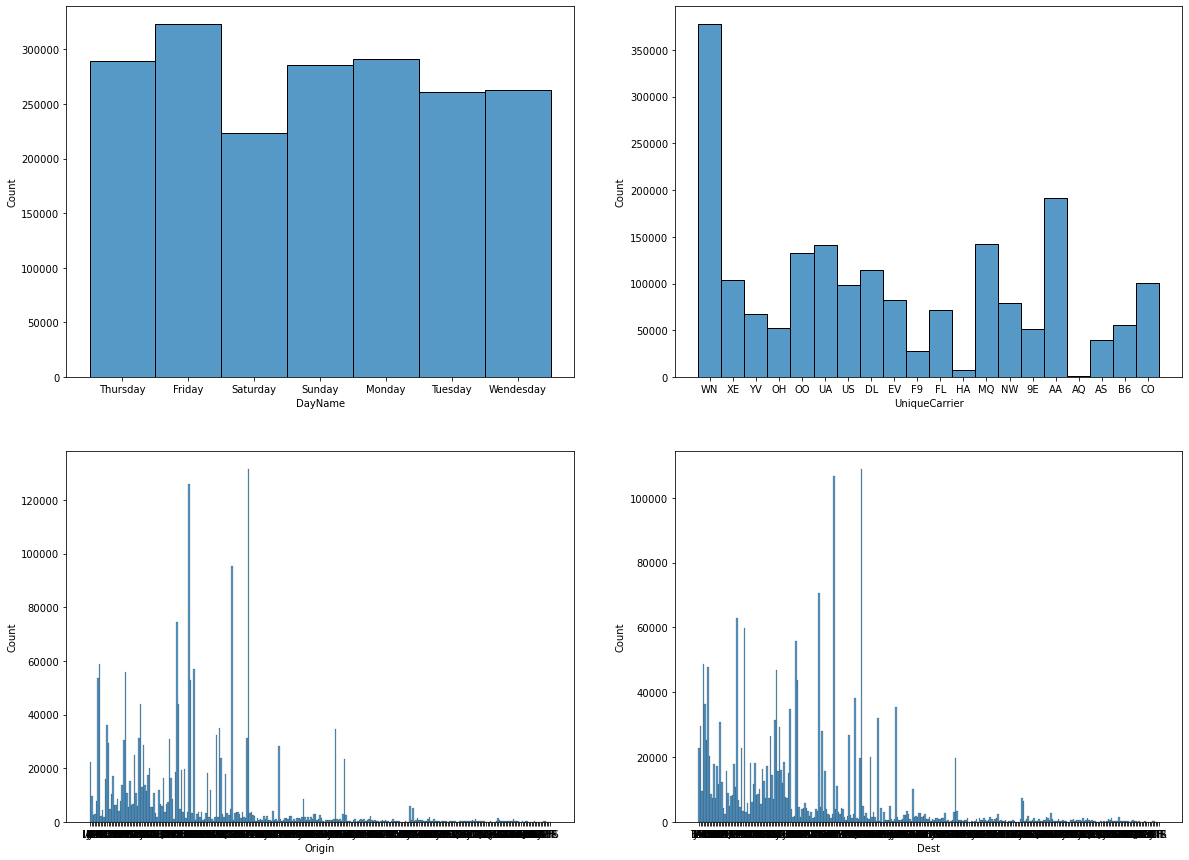

In [389]:
columns_names_describe_categorical_1 = describe_categorical_1.columns

fig, axes = plt.subplots(2, 2,figsize=(20,15))
axes = axes.flatten()

for i, attribute in enumerate(columns_names_describe_categorical_1):
    summary_categorical_1 = sns.histplot(x=attribute, data=new_delay_df, ax=axes[i])

  
fig_summary_cat_1 =  summary_categorical_1.figure

fig_summary_cat_1.savefig("fig_summary_cat_1.png") 





In [390]:
describe_categorical_2 = new_delay_df[["Date"]].describe(datetime_is_numeric=True)
describe_categorical_2

,Date
count,1936758
mean,2008-06-19 04:49:06.844572416
min,2008-01-01 00:00:00
25%,2008-03-18 00:00:00
50%,2008-06-14 00:00:00
75%,2008-09-09 00:00:00
max,2008-12-31 00:00:00


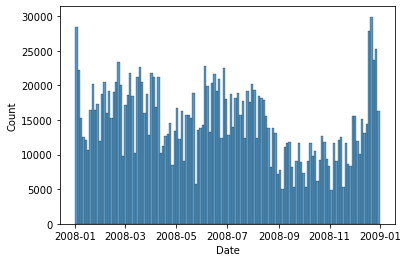

In [391]:
summary_categorical_2 = sns.histplot(x="Date", data=new_delay_df)

  
fig_summary_cat_2 =  summary_categorical_2.figure

fig_summary_cat_2.savefig("fig_summary_cat_2.png") 



In [392]:
"""We can do a DF with the results and in case of report only a page 
concat the two DF"""


x_df = pd.DataFrame(numeric_describe)
y_df = pd.DataFrame(describe_categorical_1)
z_df = pd.DataFrame(describe_categorical_2)


#concat the DF
df_description = pd.concat([x_df,z_df,y_df], axis=1)


#Fill the NaN with "-"
df_description_new = df_description.fillna("-")

df_description_new


,Distance,DepDelay,ArrDelay,AirTime,TaxiIn,TaxiOut,ActualElapsedTime,Date,DayName,UniqueCarrier,Origin,Dest
count,1936758.0,1936758.0,1928371.0,1928371.0,1929648.0,1936303.0,1928371.0,1936758,1936758,1936758,1936758,1936758
mean,765.686159,43.185176,42.199885,108.277147,6.812975,18.232203,133.305863,2008-06-19 04:49:06.844572416,-,-,-,-
std,574.479653,53.402502,56.784715,68.64261,5.273595,14.338534,72.060069,-,-,-,-,-
min,11.0,6.0,-109.0,0.0,0.0,0.0,14.0,2008-01-01 00:00:00,-,-,-,-
25%,338.0,12.0,9.0,58.0,4.0,10.0,80.0,2008-03-18 00:00:00,-,-,-,-
50%,606.0,24.0,24.0,90.0,6.0,14.0,116.0,2008-06-14 00:00:00,-,-,-,-
75%,998.0,53.0,56.0,137.0,8.0,21.0,165.0,2008-09-09 00:00:00,-,-,-,-
max,4962.0,2467.0,2461.0,1091.0,240.0,422.0,1114.0,2008-12-31 00:00:00,-,-,-,-
unique,-,-,-,-,-,-,-,-,7,20,303,304
top,-,-,-,-,-,-,-,-,Friday,WN,ATL,ORD


<h4>How many missing data are per column ? </h4>

In [393]:
"""
The function isnull() return a boolean but we want the sum of NaN so isnull().sum() return 
the sum of NaN
"""

null_data = new_delay_df.isnull().sum()
null_data

Date                    0
DayName                 0
UniqueCarrier           0
FlightNum               0
Origin                  0
Dest                    0
Distance                0
CRSDepTime              0
CRSArrTime              0
DepTime                 0
ArrTime              7110
DepDelay                0
ArrDelay             8387
AirTime              8387
TaxiIn               7110
TaxiOut               455
ActualElapsedTime    8387
CRSElapsedTime        198
Cancelled               0
dtype: int64

<h4>Filling the NaN values</h4>

In [394]:
#Fill the NaN with 0 

df_delay_new = new_delay_df.dropna()

df_delay_new

,Date,DayName,UniqueCarrier,FlightNum,Origin,Dest,Distance,CRSDepTime,CRSArrTime,DepTime,ArrTime,DepDelay,ArrDelay,AirTime,TaxiIn,TaxiOut,ActualElapsedTime,CRSElapsedTime,Cancelled
0,2008-01-03,Thursday,WN,335,IAD,TPA,810,1955,2225,2003.0,2211.0,8.0,-14.0,116.0,4.0,8.0,128.0,150.0,0
1,2008-01-03,Thursday,WN,3231,IAD,TPA,810,735,1000,754.0,1002.0,19.0,2.0,113.0,5.0,10.0,128.0,145.0,0
2,2008-01-03,Thursday,WN,448,IND,BWI,515,620,750,628.0,804.0,8.0,14.0,76.0,3.0,17.0,96.0,90.0,0
4,2008-01-03,Thursday,WN,3920,IND,BWI,515,1755,1925,1829.0,1959.0,34.0,34.0,77.0,3.0,10.0,90.0,90.0,0
5,2008-01-03,Thursday,WN,378,IND,JAX,688,1915,2110,1940.0,2121.0,25.0,11.0,87.0,4.0,10.0,101.0,115.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008-12-13,Saturday,DL,1621,MSP,ATL,906,1220,1552,1250.0,1617.0,30.0,25.0,120.0,9.0,18.0,147.0,152.0,0
7009717,2008-12-13,Saturday,DL,1631,RIC,ATL,481,600,749,657.0,904.0,57.0,75.0,78.0,15.0,34.0,127.0,109.0,0
7009718,2008-12-13,Saturday,DL,1631,ATL,IAH,689,847,1010,1007.0,1149.0,80.0,99.0,122.0,8.0,32.0,162.0,143.0,0
7009726,2008-12-13,Saturday,DL,1639,IAD,ATL,533,1240,1437,1251.0,1446.0,11.0,9.0,89.0,13.0,13.0,115.0,117.0,0


In [395]:
#The DF is filled and the sum of NaN value is 0 in all column 

df_delay_new.isnull().sum()

Date                 0
DayName              0
UniqueCarrier        0
FlightNum            0
Origin               0
Dest                 0
Distance             0
CRSDepTime           0
CRSArrTime           0
DepTime              0
ArrTime              0
DepDelay             0
ArrDelay             0
AirTime              0
TaxiIn               0
TaxiOut              0
ActualElapsedTime    0
CRSElapsedTime       0
Cancelled            0
dtype: int64

<h3>Create new columns (average flight speed, whether late or not ...)</h3>

<h4>Column with travel speed</h4>

In [396]:
#Column with the travel speed 

df_delay_new = df_delay_new.assign(Speed=lambda x: (x["Distance"] / ((x["AirTime"])/60)))

df_delay_new.describe()


,FlightNum,Distance,CRSDepTime,CRSArrTime,DepTime,ArrTime,DepDelay,ArrDelay,AirTime,TaxiIn,TaxiOut,ActualElapsedTime,CRSElapsedTime,Cancelled,Speed
count,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1.928371e+06,1928371.0,1.928371e+06
mean,2.184296e+03,7.649486e+02,1.467718e+03,1.634196e+03,1.518648e+03,1.610242e+03,4.309169e+01,4.219988e+01,1.082771e+02,6.811388e+00,1.821733e+01,1.333059e+02,1.341977e+02,0.0,inf
std,1.944450e+03,5.738858e+02,4.247281e+02,4.646284e+02,4.504352e+02,5.480009e+02,5.326600e+01,5.678472e+01,6.864261e+01,5.268051e+00,1.430838e+01,7.206007e+01,7.123339e+01,0.0,NaN
min,1.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,-1.090000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,-2.100000e+01,0.0,2.129032e+01
25%,6.110000e+02,3.380000e+02,1.135000e+03,1.325000e+03,1.203000e+03,1.316000e+03,1.200000e+01,9.000000e+00,5.800000e+01,4.000000e+00,1.000000e+01,8.000000e+01,8.200000e+01,0.0,3.518644e+02
50%,1.543000e+03,6.060000e+02,1.510000e+03,1.705000e+03,1.545000e+03,1.715000e+03,2.400000e+01,2.400000e+01,9.000000e+01,6.000000e+00,1.400000e+01,1.160000e+02,1.160000e+02,0.0,4.038202e+02
75%,3.423000e+03,9.970000e+02,1.815000e+03,2.014000e+03,1.900000e+03,2.030000e+03,5.300000e+01,5.600000e+01,1.370000e+02,8.000000e+00,2.100000e+01,1.650000e+02,1.650000e+02,0.0,4.481481e+02
max,9.741000e+03,4.962000e+03,2.359000e+03,2.359000e+03,2.400000e+03,2.400000e+03,2.467000e+03,2.461000e+03,1.091000e+03,2.400000e+02,4.220000e+02,1.114000e+03,6.600000e+02,0.0,inf


In [397]:
df_delay_new.replace([np.inf, -np.inf], np.nan,inplace=True)
df_delay_new.dropna(inplace=True)
np.isinf(df_delay_new.Speed).any()

False

In [398]:
df_delay_new.describe()

,FlightNum,Distance,CRSDepTime,CRSArrTime,DepTime,ArrTime,DepDelay,ArrDelay,AirTime,TaxiIn,TaxiOut,ActualElapsedTime,CRSElapsedTime,Cancelled,Speed
count,1.928364e+06,1.928364e+06,1.928364e+06,1.928364e+06,1.928364e+06,1.928364e+06,1.928364e+06,1.928364e+06,1.928364e+06,1.928364e+06,1.928364e+06,1.928364e+06,1.928364e+06,1928364.0,1.928364e+06
mean,2.184288e+03,7.649496e+02,1.467717e+03,1.634196e+03,1.518648e+03,1.610242e+03,4.309160e+01,4.219976e+01,1.082775e+02,6.811264e+00,1.821716e+01,1.333060e+02,1.341978e+02,0.0,3.969527e+02
std,1.944446e+03,5.738861e+02,4.247286e+02,4.646290e+02,4.504358e+02,5.480015e+02,5.326596e+01,5.678466e+01,6.864242e+01,5.267210e+00,1.430747e+01,7.206012e+01,7.123342e+01,0.0,9.751459e+01
min,1.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00,-1.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,-2.100000e+01,0.0,2.129032e+01
25%,6.110000e+02,3.380000e+02,1.135000e+03,1.325000e+03,1.203000e+03,1.316000e+03,1.200000e+01,9.000000e+00,5.800000e+01,4.000000e+00,1.000000e+01,8.000000e+01,8.200000e+01,0.0,3.518644e+02
50%,1.543000e+03,6.060000e+02,1.510000e+03,1.705000e+03,1.545000e+03,1.715000e+03,2.400000e+01,2.400000e+01,9.000000e+01,6.000000e+00,1.400000e+01,1.160000e+02,1.160000e+02,0.0,4.038202e+02
75%,3.423000e+03,9.970000e+02,1.815000e+03,2.014000e+03,1.900000e+03,2.030000e+03,5.300000e+01,5.600000e+01,1.370000e+02,8.000000e+00,2.100000e+01,1.650000e+02,1.650000e+02,0.0,4.481481e+02
max,9.741000e+03,4.962000e+03,2.359000e+03,2.359000e+03,2.400000e+03,2.400000e+03,2.467000e+03,2.461000e+03,1.091000e+03,2.400000e+02,4.220000e+02,1.114000e+03,6.600000e+02,0.0,5.592000e+04


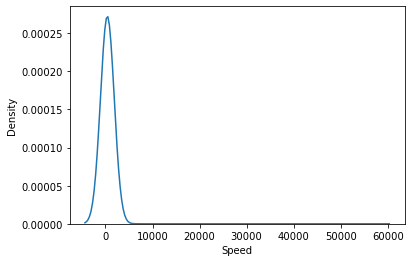

In [399]:
fig_speed = sns.kdeplot(data=df_delay_new,x="Speed", bw_method=15)
fig_speed_density = fig_speed.figure
fig_speed_density.savefig("fig_speed_density.png")

In [400]:
col = "Speed"
col_speed = create_series(df_delay_new,col)

col_speed

0          418.965517
1          430.088496
2          406.578947
4          401.298701
5          474.482759
              ...    
7009710    453.000000
7009717    370.000000
7009718    338.852459
7009726    359.325843
7009727    504.230769
Name: Speed, Length: 1928364, dtype: float64

<h4>Column with flight status</h4>

In [401]:
df_delay_new["Status"] = np.where(df_delay_new["ActualElapsedTime"] <= df_delay_new["CRSElapsedTime"],"OnTime","Delayed")    
df_delay_new

,Date,DayName,UniqueCarrier,FlightNum,Origin,Dest,Distance,CRSDepTime,CRSArrTime,DepTime,...,DepDelay,ArrDelay,AirTime,TaxiIn,TaxiOut,ActualElapsedTime,CRSElapsedTime,Cancelled,Speed,Status
0,2008-01-03,Thursday,WN,335,IAD,TPA,810,1955,2225,2003.0,...,8.0,-14.0,116.0,4.0,8.0,128.0,150.0,0,418.965517,OnTime
1,2008-01-03,Thursday,WN,3231,IAD,TPA,810,735,1000,754.0,...,19.0,2.0,113.0,5.0,10.0,128.0,145.0,0,430.088496,OnTime
2,2008-01-03,Thursday,WN,448,IND,BWI,515,620,750,628.0,...,8.0,14.0,76.0,3.0,17.0,96.0,90.0,0,406.578947,Delayed
4,2008-01-03,Thursday,WN,3920,IND,BWI,515,1755,1925,1829.0,...,34.0,34.0,77.0,3.0,10.0,90.0,90.0,0,401.298701,OnTime
5,2008-01-03,Thursday,WN,378,IND,JAX,688,1915,2110,1940.0,...,25.0,11.0,87.0,4.0,10.0,101.0,115.0,0,474.482759,OnTime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008-12-13,Saturday,DL,1621,MSP,ATL,906,1220,1552,1250.0,...,30.0,25.0,120.0,9.0,18.0,147.0,152.0,0,453.000000,OnTime
7009717,2008-12-13,Saturday,DL,1631,RIC,ATL,481,600,749,657.0,...,57.0,75.0,78.0,15.0,34.0,127.0,109.0,0,370.000000,Delayed
7009718,2008-12-13,Saturday,DL,1631,ATL,IAH,689,847,1010,1007.0,...,80.0,99.0,122.0,8.0,32.0,162.0,143.0,0,338.852459,Delayed
7009726,2008-12-13,Saturday,DL,1639,IAD,ATL,533,1240,1437,1251.0,...,11.0,9.0,89.0,13.0,13.0,115.0,117.0,0,359.325843,OnTime


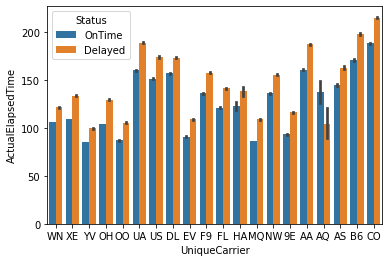

In [402]:
status_flight = sns.barplot(data=df_delay_new, x="UniqueCarrier", y= "ActualElapsedTime", hue="Status")
fig_status_flight = status_flight.figure
fig_status_flight.savefig("fig_status_flight.png")

<h4>Table with airport taxi</h4>

In [403]:
"""This column is the mean of all the route of the plane inside the airport to take place 
for the take off"""

taxi_origin = df_delay_new.groupby(["Origin"])["TaxiOut"].mean()
df_taxi_origin = pd.DataFrame(taxi_origin)
df_taxi_origin.index.names = ["Airport"]
df_taxi_origin

,TaxiOut
Airport,
ABE,15.470776
ABI,9.795918
ABQ,10.633878
ABY,8.893836
ACK,19.857143
...,...
WYS,10.900000
XNA,16.167604
YAK,8.271357


In [404]:
"""This column is the mean of all the route of the plane from the moment
that landed in the Destination to the gate for the pax to get off"""

taxi_destination = df_delay_new.groupby(["Dest"])["TaxiIn"].mean()
df_taxi_destination = pd.DataFrame(taxi_destination)
df_taxi_destination.index.names = ["Airport"]
df_taxi_destination

,TaxiIn
Airport,
ABE,4.502662
ABI,3.475508
ABQ,5.179194
ABY,3.672956
ACK,5.670968
...,...
WYS,3.193548
XNA,4.924945
YAK,4.163347


In [405]:
# Concatenate the DF of the taxi destination and origin

taxi_airport = pd.concat([df_taxi_destination,df_taxi_origin],axis=1)

taxi_airport.isnull().sum()


TaxiIn     1
TaxiOut    0
dtype: int64

In [406]:
#fill the NaN values

new_taxi_airport = taxi_airport.fillna(0)

new_taxi_airport

,TaxiIn,TaxiOut
Airport,,
ABE,4.502662,15.470776
ABI,3.475508,9.795918
ABQ,5.179194,10.633878
ABY,3.672956,8.893836
ACK,5.670968,19.857143
...,...,...
XNA,4.924945,16.167604
YAK,4.163347,8.271357
YKM,4.361702,10.000000


In [407]:
"""
In this line, the taxi origin and destination columns are summed and added in a new column,
both functions works I used the second because is the most vectorized


"""

#new_taxi_airport["TaxiAirport"] = new_taxi_airport.apply(lambda x: x["TaxiIn"] + x["TaxiOut"], axis=1)



new_taxi_airport["TaxiAirport"] = new_taxi_airport["TaxiIn"] + new_taxi_airport["TaxiOut"]
new_taxi_airport

,TaxiIn,TaxiOut,TaxiAirport
Airport,,,
ABE,4.502662,15.470776,19.973437
ABI,3.475508,9.795918,13.271426
ABQ,5.179194,10.633878,15.813072
ABY,3.672956,8.893836,12.566792
ACK,5.670968,19.857143,25.528111
...,...,...,...
XNA,4.924945,16.167604,21.092549
YAK,4.163347,8.271357,12.434703
YKM,4.361702,10.000000,14.361702


In [408]:
#Function that sort the total Taxi by airport this can be seen as data for airport effiency

col = "TaxiAirport"
sort_taxi_airport = sort_values(new_taxi_airport,col)
sort_taxi_airport

,TaxiIn,TaxiOut,TaxiAirport
Airport,,,
JFK,11.614974,40.515648,52.130622
EWR,10.475312,31.733831,42.209143
LGA,8.570217,31.363112,39.933330
PHL,7.237727,26.599675,33.837402
DTW,10.480128,23.127605,33.607733
...,...,...,...
DLG,2.904762,6.938462,9.843223
SCC,3.902857,5.899582,9.802439
OME,3.551095,5.852941,9.404036


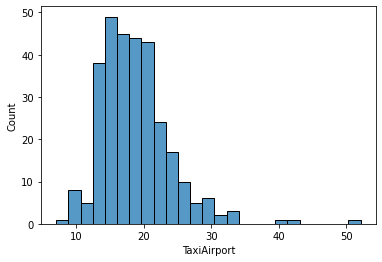

In [409]:
taxi_airport_plot = sns.histplot(data=sort_taxi_airport, x= "TaxiAirport")
fig_taxi_airport_plot = taxi_airport_plot.figure
fig_taxi_airport_plot.savefig("fig_taxi_airport_plot.png")

<h4>Table with delayed flights</h4>

In [410]:
#In this cell the total flights by the carrier is showed

carrier_flights = df_delay_new.groupby(["UniqueCarrier"])["Origin"].apply(lambda x: x.count())
carrier_flights.rename("Flights")
df_carrier_flights = pd.DataFrame(carrier_flights)
df_carrier_flight = df_carrier_flights.rename(columns={df_carrier_flights.columns[0]: "Flights"})
df_carrier_flight


,Flights
UniqueCarrier,
9E,51569
AA,190910
AQ,744
AS,39010
B6,54925
CO,99731
DL,113728
EV,81762
F9,28224


In [411]:
#In this cell the total ontime flight by the carrier is showed

status_ontime_flights = df_delay_new.groupby("UniqueCarrier")["Status"].apply(lambda x: x[x.str.contains("OnTime")].count())
status_ontime_flights.rename("OnTime")
df_status_ontime_flights = pd.DataFrame(status_ontime_flights)
df_status_ontime_flight = df_status_ontime_flights.rename(columns={df_status_ontime_flights.columns[0]: "OnTime"})
df_status_ontime_flight


,OnTime
UniqueCarrier,
9E,32174
AA,115955
AQ,513
AS,24804
B6,33080
CO,65868
DL,65377
EV,51146
F9,16730


In [412]:
#In this cell the total delayed  flights by the carrier is showed

status_delayed_flights = df_delay_new.groupby("UniqueCarrier")["Status"].apply(lambda x: x[x.str.contains("Delayed")].count())
status_delayed_flights.rename("Delayed")
df_status_delayed_flights = pd.DataFrame(status_delayed_flights)
df_status_delayed_flight=df_status_delayed_flights.rename(columns={df_status_delayed_flights.columns[0]: "Delayed"})
df_status_delayed_flight

,Delayed
UniqueCarrier,
9E,19395
AA,74955
AQ,231
AS,14206
B6,21845
CO,33863
DL,48351
EV,30616
F9,11494


In [413]:
#The previus columns are concatenate in a single DF

status_flights_ratios = pd.concat([df_carrier_flight,df_status_ontime_flight,df_status_delayed_flight],axis=1)
status_flights_ratios.index.names = ["Carrier"]
status_flights_ratios.reset_index(drop=True,inplace=True)
status_flights_ratios

,Flights,OnTime,Delayed
0,51569,32174,19395
1,190910,115955,74955
2,744,513,231
3,39010,24804,14206
4,54925,33080,21845
5,99731,65868,33863
6,113728,65377,48351
7,81762,51146,30616
8,28224,16730,11494
9,70969,41263,29706


In [414]:
carrier_names = df_delay["UniqueCarrier"].unique()
carrier_names_df = pd.DataFrame(carrier_names)
carrier_renames_df = carrier_names_df.rename(columns ={0:"Carrier"})

In [415]:
delayed_flights_df = pd.concat([carrier_renames_df,status_flights_ratios],axis=1)
delayed_flights_df

,Carrier,Flights,OnTime,Delayed
0,WN,51569,32174,19395
1,XE,190910,115955,74955
2,YV,744,513,231
3,OH,39010,24804,14206
4,OO,54925,33080,21845
5,UA,99731,65868,33863
6,US,113728,65377,48351
7,DL,81762,51146,30616
8,EV,28224,16730,11494
9,F9,70969,41263,29706


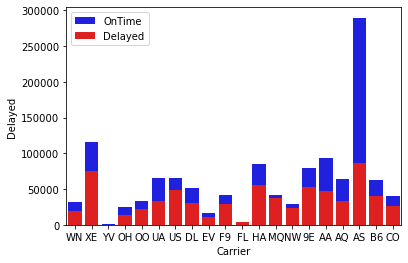

In [416]:
flights = sns.barplot(x = "Carrier", y="OnTime",data=delayed_flights_df,color="blue",label="OnTime")
flights = sns.barplot(x = "Carrier", y="Delayed",data=delayed_flights_df,color="red",label="Delayed")
plt.legend()
flights_fig = flights.figure
flights_fig.savefig("Delayed_Ontime_Fig.png")

In [417]:
#The RatioStatus column is added as the ratio oh OnTime/Delayed flights

delayed_flights_df["RatioStatus"] = delayed_flights_df.apply(lambda x: x.Delayed/x.OnTime,axis=1)
delayed_flights_df

,Carrier,Flights,OnTime,Delayed,RatioStatus
0,WN,51569,32174,19395,0.602816
1,XE,190910,115955,74955,0.646415
2,YV,744,513,231,0.450292
3,OH,39010,24804,14206,0.572730
4,OO,54925,33080,21845,0.660369
5,UA,99731,65868,33863,0.514104
6,US,113728,65377,48351,0.739572
7,DL,81762,51146,30616,0.598600
8,EV,28224,16730,11494,0.687029
9,F9,70969,41263,29706,0.719919


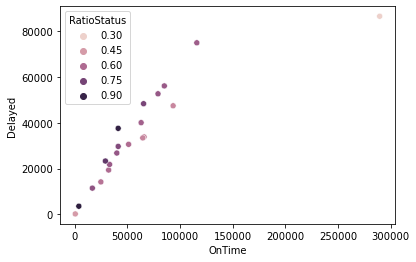

In [418]:
delayed_flight_ratio = sns.scatterplot(data=delayed_flights_df,x="OnTime",y="Delayed",hue="RatioStatus")
fig_delayed_flight_ratio = delayed_flight_ratio.figure
fig_delayed_flight_ratio.savefig("delayed_flight_ratio.png")

In [419]:
#The RatioStatus is sorted this show the carrier with the most delayed flights

col = "RatioStatus"
sort_ratio_status = sort_values(delayed_flights_df,col)
sort_ratio_status

,Carrier,Flights,OnTime,Delayed,RatioStatus
10,FL,7472,3875,3597,0.928258
12,MQ,78843,41247,37596,0.911484
13,NW,52453,29124,23329,0.801023
6,US,113728,65377,48351,0.739572
9,F9,70969,41263,29706,0.719919
8,EV,28224,16730,11494,0.687029
19,CO,66769,39952,26817,0.671230
14,9E,131774,79091,52683,0.666106
4,OO,54925,33080,21845,0.660369
11,HA,141223,85098,56125,0.659534


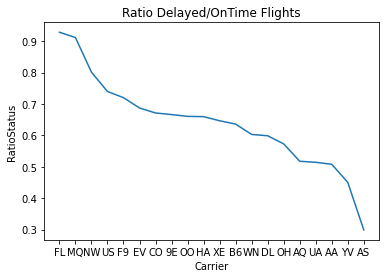

In [420]:
delayed_ratio_flights = sns.lineplot(data=sort_ratio_status, x="Carrier", y="RatioStatus").set(title="Ratio Delayed/OnTime Flights")

<h4>Longest flight</h4>

In [421]:
"""The elapsed time column is the time of all the flight phases. CRSElapsepTime and ActualElapsedTime
have missing data so I prefered the Actual Elapsed Time"""

travel_time = df_delay_new[["UniqueCarrier","Origin","Dest","ActualElapsedTime"]]
travel_time["Route"] = travel_time["Origin"] +"-"+ travel_time["Dest"]

route_travel_time = travel_time.groupby("Route").mean()
route_travel_time



/var/folders/dh/zgkrvpwn7m3__1vpx517jpzw0000gn/T/ipykernel_2212/619742504.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel_time["Route"] = travel_time["Origin"] +"-"+ travel_time["Dest"]


,ActualElapsedTime
Route,
ABE-ATL,134.236948
ABE-BHM,136.000000
ABE-CLE,82.470588
ABE-CLT,100.375000
ABE-CVG,105.083333
...,...
YUM-IPL,31.915254
YUM-LAS,75.240000
YUM-LAX,76.217391


In [422]:
#Sort the Elapsed time to view the longest actual flight

col = "ActualElapsedTime"

sorted_flight_time = sort_values(route_travel_time,col)
sorted_flight_time

,ActualElapsedTime
Route,
EWR-HNL,637.958491
ATL-HNL,583.228758
HNL-EWR,575.175439
ORD-HNL,544.339806
ORD-OGG,530.945946
...,...
LGB-ONT,27.000000
SBA-SBP,26.000000
IAH-HOU,26.000000


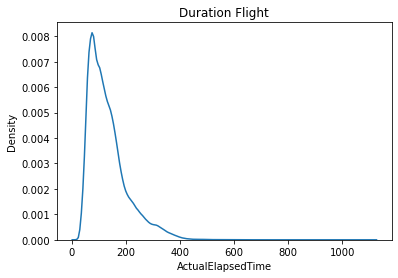

In [423]:
density_duration_flight = sns.kdeplot(data=travel_time,x="ActualElapsedTime").set(title="Duration Flight")

<h4>Most Delayed Flight</h4>

In [424]:
#To know the most delayed fligh I will compare the programmed and actual time of the flights 

delayed_time = df_delay_new[["UniqueCarrier","Origin","Dest","ActualElapsedTime","CRSElapsedTime"]]
df_delayed_time = pd.DataFrame(delayed_time)
df_delayed_time

,UniqueCarrier,Origin,Dest,ActualElapsedTime,CRSElapsedTime
0,WN,IAD,TPA,128.0,150.0
1,WN,IAD,TPA,128.0,145.0
2,WN,IND,BWI,96.0,90.0
4,WN,IND,BWI,90.0,90.0
5,WN,IND,JAX,101.0,115.0
...,...,...,...,...,...
7009710,DL,MSP,ATL,147.0,152.0
7009717,DL,RIC,ATL,127.0,109.0
7009718,DL,ATL,IAH,162.0,143.0
7009726,DL,IAD,ATL,115.0,117.0


In [425]:
#I will make a substraction and add a new column RatioDelayed

df_delayed_time["DelayedTime"] = (df_delayed_time["CRSElapsedTime"] - df_delayed_time["ActualElapsedTime"])* (-1) 
df_delayed_time

,UniqueCarrier,Origin,Dest,ActualElapsedTime,CRSElapsedTime,DelayedTime
0,WN,IAD,TPA,128.0,150.0,-22.0
1,WN,IAD,TPA,128.0,145.0,-17.0
2,WN,IND,BWI,96.0,90.0,6.0
4,WN,IND,BWI,90.0,90.0,-0.0
5,WN,IND,JAX,101.0,115.0,-14.0
...,...,...,...,...,...,...
7009710,DL,MSP,ATL,147.0,152.0,-5.0
7009717,DL,RIC,ATL,127.0,109.0,18.0
7009718,DL,ATL,IAH,162.0,143.0,19.0
7009726,DL,IAD,ATL,115.0,117.0,-2.0


In [426]:
#sort the values of the new column

col = "DelayedTime"

sorted_delayed_time = sort_values(df_delayed_time,col)
sorted_delayed_time

,UniqueCarrier,Origin,Dest,ActualElapsedTime,CRSElapsedTime,DelayedTime
5180146,HA,SEA,HNL,1114.0,355.0,759.0
4614554,HA,HNL,SEA,750.0,335.0,415.0
6987056,CO,IAH,MSP,574.0,179.0,395.0
6572988,XE,IAH,BTR,448.0,64.0,384.0
3922427,DL,JFK,SFO,776.0,408.0,368.0
...,...,...,...,...,...,...
3092993,XE,SAN,ABQ,95.0,220.0,-125.0
3698229,WN,AUS,SAN,42.0,170.0,-128.0
1637767,9E,PIT,ATL,148.0,290.0,-142.0
1705852,AA,LGA,MIA,211.0,362.0,-151.0


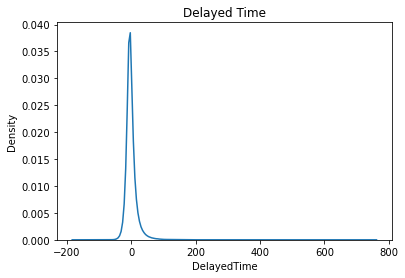

In [427]:
density_delayed_flight= sns.kdeplot(data= df_delayed_time,x= "DelayedTime").set(title="Delayed Time")

In [428]:
#This series will be added to the original DF

col = "DelayedTime"
ratio_delayed = create_series(df_delayed_time,col)
ratio_delayed 

0         -22.0
1         -17.0
2           6.0
4          -0.0
5         -14.0
           ... 
7009710    -5.0
7009717    18.0
7009718    19.0
7009726    -2.0
7009727   -12.0
Name: DelayedTime, Length: 1928364, dtype: float64

<h3>Export to Excel</h3>

In [429]:
sort_taxi_airport

,TaxiIn,TaxiOut,TaxiAirport
Airport,,,
JFK,11.614974,40.515648,52.130622
EWR,10.475312,31.733831,42.209143
LGA,8.570217,31.363112,39.933330
PHL,7.237727,26.599675,33.837402
DTW,10.480128,23.127605,33.607733
...,...,...,...
DLG,2.904762,6.938462,9.843223
SCC,3.902857,5.899582,9.802439
OME,3.551095,5.852941,9.404036


In [430]:
sort_ratio_status

,Carrier,Flights,OnTime,Delayed,RatioStatus
10,FL,7472,3875,3597,0.928258
12,MQ,78843,41247,37596,0.911484
13,NW,52453,29124,23329,0.801023
6,US,113728,65377,48351,0.739572
9,F9,70969,41263,29706,0.719919
8,EV,28224,16730,11494,0.687029
19,CO,66769,39952,26817,0.671230
14,9E,131774,79091,52683,0.666106
4,OO,54925,33080,21845,0.660369
11,HA,141223,85098,56125,0.659534


In [431]:
sorted_flight_time

,ActualElapsedTime
Route,
EWR-HNL,637.958491
ATL-HNL,583.228758
HNL-EWR,575.175439
ORD-HNL,544.339806
ORD-OGG,530.945946
...,...
LGB-ONT,27.000000
SBA-SBP,26.000000
IAH-HOU,26.000000


In [432]:
"""The original DF will be concatenate wiith the series. 
The Data is sliced because the data is bigger than the excel file can store
and all the sliced data is concat. 
"""

sliced_data = df_copy[:500]
sliced_speed = col_speed[:500]
sliced_status = status[:500]
sliced_ratio_delayed = ratio_delayed[:500]
sliced_sorted_flight_time = sorted_flight_time[:500]

df_updated_flights_data = pd.concat([sliced_data,sliced_speed,sliced_status,sliced_ratio_delayed],axis=1)
df_updated_flights_data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Speed,Status,DelayedTime
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,N,0,NaN,NaN,NaN,NaN,NaN,418.965517,OnTime,-22.0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,N,0,NaN,NaN,NaN,NaN,NaN,430.088496,OnTime,-17.0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,N,0,NaN,NaN,NaN,NaN,NaN,406.578947,Delayed,6.0
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,N,0,2.0,0.0,0.0,0.0,32.0,401.298701,OnTime,-0.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,N,0,NaN,NaN,NaN,NaN,NaN,474.482759,OnTime,-14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,2008,1,3,4,1332.0,1255,1546.0,1515,WN,1828,...,N,0,19.0,0.0,0.0,0.0,12.0,425.454545,OnTime,-6.0
691,2008,1,3,4,2057.0,1955,2321.0,2215,WN,2975,...,N,0,46.0,0.0,4.0,0.0,16.0,432.000000,Delayed,4.0
692,2008,1,3,4,2334.0,1950,157.0,2235,WN,106,...,N,0,15.0,0.0,0.0,0.0,187.0,502.191781,OnTime,-22.0
693,2008,1,3,4,1338.0,1300,1617.0,1545,WN,208,...,N,0,32.0,0.0,0.0,0.0,0.0,416.590909,OnTime,-6.0


In [435]:
#the excel is created with the data each DF have is individual page

with pd.ExcelWriter("updated_delayed_flights.xlsx") as writer:
    null_data.to_excel(writer, sheet_name="null_data_original_df")
    df_updated_flights_data.to_excel(writer, sheet_name="updated_flights_data")
    sort_taxi_airport.to_excel(writer, sheet_name="sorted_taxi_airport")
    sort_ratio_status.to_excel(writer, sheet_name="sort_ratio_status")
    sliced_sorted_flight_time.to_excel(writer, sheet_name="sorted_flight_time")
    
    
    
